In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
def input():
    r = np.random.uniform(0.9, 1.1)
    theta = np.random.uniform(0, np.pi) 
    x = r * np.cos(theta)
    y = r * np.sin(theta) 
    return [x, y] 

def initialize_(N_input, N_output):
    # w = np.zeros((N_input, N_output))
    # for i in range(N_input):
    #     for j in range(N_output):
    #         w[i][j] += np.random.uniform(0, 1)
    # return w

    w_1 = np.random.uniform(-1, 1, N_output)
    w_2 = np.random.uniform(0, 1, N_output)
    return np.vstack((w_1, w_2))

    

def w_inicial(N_output):
    # Pongo a los x iniciales sobre una línea pero desordenados
    w_2 = 0.5 * np.ones(N_output)
    w_1 = np.linspace(-1, 1, N_output)
    np.random.shuffle(w_1)
    return np.vstack((w_1, w_2))

def Gaussian_neighbour(i, i_, sigma):
    return np.exp(-(i-i_)**2/(2 * sigma**2))

def get_winnerix(x, w):
    return np.argmin(np.linalg.norm(w.T - x, axis=1))

def get_dw(i_, w, x, sigma):
    dw = x - w.T

    for i in range(len(dw)):
        Lambda = Gaussian_neighbour(i, i_, sigma)
        dw[i] *= Lambda

    return dw.T

def train(epochs, N_input, N_output, sigma, lr=0.01):
    #w = w_inicial(N_output)
    w = initialize_(N_input, N_output)
    w_log = [np.copy(w)]

    for epoch in range(epochs):
        x = input()
        i_ = get_winnerix(x, w)

        dw = get_dw(i_, w, x, sigma)
        w += (lr*dw)

        w_log.append(np.copy(w))
    
    return np.array(w_log)

def plot(sigma, N_input=2, N_output=10, epochs=100000):
    w = train(epochs, N_input, N_output, sigma)

    # Parámetros
    r_inner = 0.9  # Radio interno
    r_outer = 1.1  # Radio externo
    theta = np.linspace(0, np.pi, 100)  # Ángulo entre 0 y π (media corona)

    # Coordenadas para la circunferencia interna (mitad superior)
    x_inner = r_inner * np.cos(theta)
    y_inner = r_inner * np.sin(theta)

    # Coordenadas para la circunferencia externa (mitad superior)
    x_outer = r_outer * np.cos(theta)
    y_outer = r_outer * np.sin(theta)

    # Invertimos las coordenadas para cerrar la forma completa (desde el exterior hacia el interior)
    x_full = np.concatenate([x_outer, x_inner[::-1]])
    y_full = np.concatenate([y_outer, y_inner[::-1]])

    # Graficar la media corona
    plt.fill(x_full, y_full, color='lightgray')

    plt.plot(w[0][0], w[0][1], 'o--', label='Pesos iniciales', alpha=0.4)
    plt.plot(w[1000][0], w[1000][1], 'o--', label='$10^3$ iteraciones', alpha=0.4)
    plt.plot(w[10000][0], w[10000][1], 'o--', label='$10^4$ iteraciones', alpha=0.4)
    plt.plot(w[-1][0], w[-1][1], 'o--', label='$10^5$ iteraciones')

    # Les pongo el índice
    # for i, (xi, yi) in enumerate(zip(w[0][0], w[0][1])):
    #     plt.annotate(i + 1, (xi, yi), textcoords="offset points", xytext=(0, 5), ha='center')

    for i, (xi, yi) in enumerate(zip(w[-1][0], w[-1][1])):
        plt.annotate(i + 1, (xi, yi), textcoords="offset points", xytext=(0, 5), ha='center')

    plt.xlabel('$x_1$', fontsize=16)
    plt.ylabel('$x_2$', fontsize=16)
    plt.ylim(0, 1.5)
    plt.legend()
    plt.gca().set_aspect('equal')
    plt.title(f'$\sigma = {sigma}$')
    plt.tick_params(axis='both', which='major', labelsize=14)

    #plt.savefig(f'ej2_sigma_{sigma}.png', dpi=300, bbox_inches='tight')
    

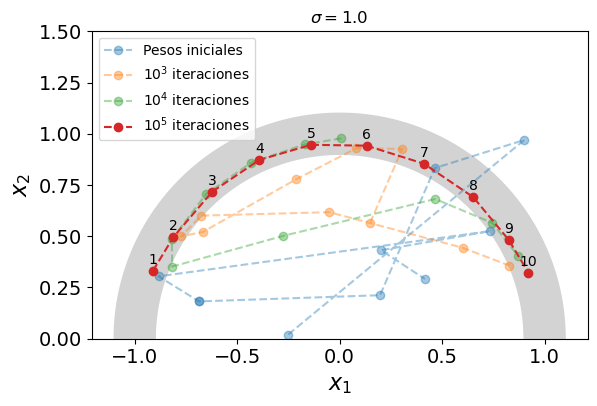

In [22]:
np.random.seed(42)
plot(1.0)